In [16]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
import simulation as sm
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import ticker
import pickle


In [21]:
params = {'legend.fontsize': 9,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

In [5]:
sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07', 'M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
                 'Illustris', 'BolshoiP', 'Bolshoi', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
                 'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8',
                 'm35s8', 'm25s9', 'm35s85', 'm3s75', 'm35s9', 'm35s7']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2, 0.3
    , 0.3, 0.35, 0.4, 0.3, 0.25, 0.2, 0.3, 0.3, 0.2, 0.25, 0.35, 0.25, 0.35, 0.3, 0.35, 0.35]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
    , 0.8, 0.75, 0.9, 0.9, 0.75, 1.0, 0.7, 0.85, 0.7, 0.8, 0.8, 0.9, 0.85, 0.75, 0.9, 0.7]

sims = dict(zip(sim_names, list(zip(omegas, sigmas))))

path = '/home/painchess/YubaHDD6T/oldsims/'


## Large growth

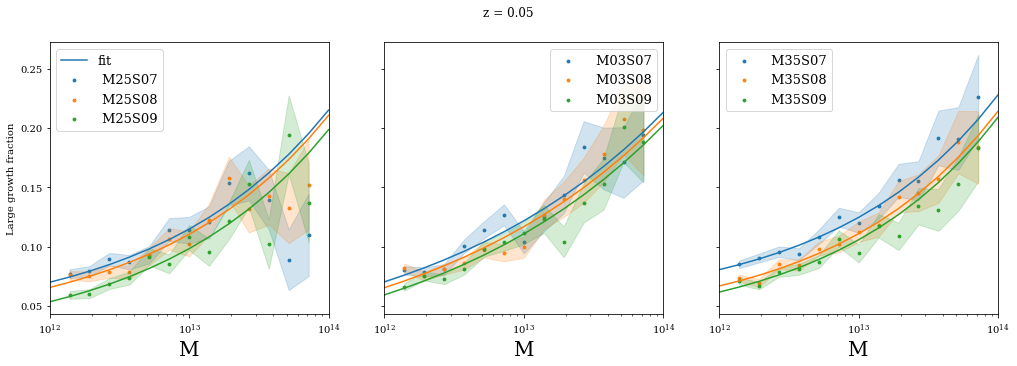

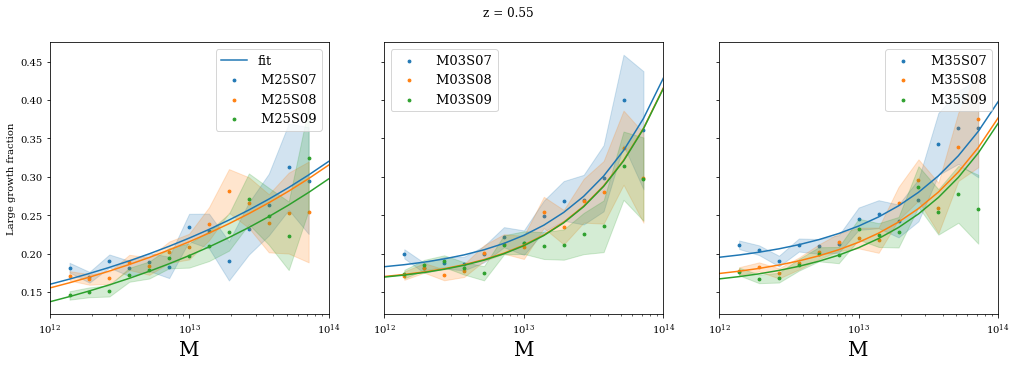

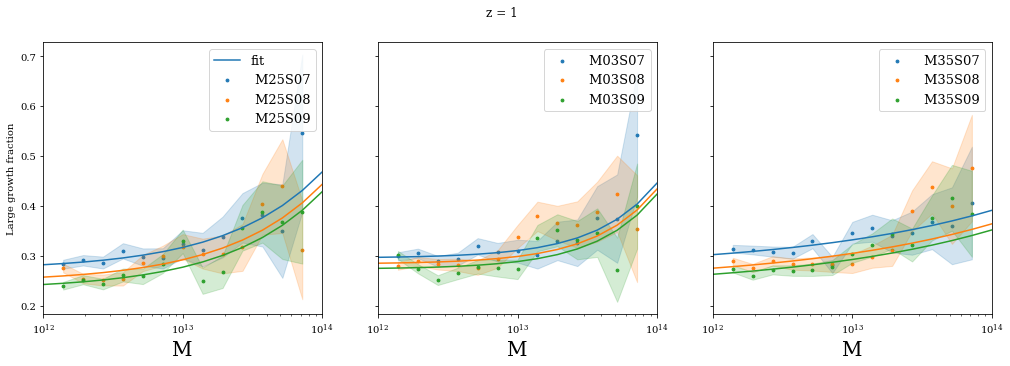

In [25]:
prefixes = ['M25S07','M03S07', 'M35S07','M25S08','M03S08', 'M35S08', 'M25S09','M03S09', 'M35S09']

nbins = 15
lmmin = 12
lmmax = 14
masses = np.logspace(lmmin, lmmax, nbins)

zfs = [0.05, 0.55, 1]
save = False

def new_f(M, A, M0, beta, p):
    return A*(M/M0)**beta + p
ps, errors = {}, {}
p0 = [ 0.11]
p0s = np.zeros((len(zfs), len(prefixes)))

for i in range(len(zfs)):
    zf = zfs[i]
    fig, axs = plt.subplots(1,3, figsize=[17, 5], sharex=True, sharey=True)
    for n in range(len(prefixes)):
        sim_name = prefixes[n]
        om, s8 = sims[sim_name]
        simt = sm.Simulation(sim_name, om, s8, path=path)
        pars = np.loadtxt('./fit_params/large_growth_params_m{:2.0f}x_z{}_pl.txt'.format(100*om, zf))
        def f(M, p):
            return new_f(M, pars[0], pars[1], pars[2], p)
        res_sim, ntot_sim, ps_sim = simt.large_growth(zf, mbins=15, save=False)
        zs, dz = sm.get_zlastdyn(zf, h=0.7, om=simt.om0, zbins=20)
        par, _ = curve_fit(f, masses[1:], res_sim[1:]/ntot_sim[1:], p0=p0, sigma=np.sqrt(res_sim[1:])/ntot_sim[1:])
        
        p0s[i,n] = par[0]
        ps[('m{:2.0f}'.format(100*om), 's{:1.0f}'.format(100*s8), 'z{}'.format(zf))]=par[0]

        errors[('m{:2.0f}'.format(100*om), 's{:1.0f}'.format(100*s8), 'z{}'.format(zf))] = np.sqrt(res_sim[1:-1])/ntot_sim[1:-1]**1.5
        axs[n%3].plot(masses, f(masses, par[0]), color='C{}'.format(n//3), label='fit'[:3*(n==0)])
        axs[n%3].scatter(masses[1:-1], res_sim[1:-1]/ntot_sim[1:-1], s=8, color='C{}'.format(n//3), label=r' {}'.format(sim_name))
        axs[n%3].fill_between(masses[1:-1], res_sim[1:-1]/ntot_sim[1:-1] - np.sqrt(res_sim[1:-1])/ntot_sim[1:-1], res_sim[1:-1]/ntot_sim[1:-1] + np.sqrt(res_sim[1:-1])/ntot_sim[1:-1], color='C{}'.format(n//3), alpha=0.2)
        axs[n%3].set_xscale('log')
        axs[n%3].set_xlabel('M', size=20)
        axs[n%3].legend()
        axs[n%3].set_xlim(1e12, 1e14)
    axs[0].set_ylabel('Large growth fraction')
    fig.suptitle('z = {}'.format(zf))
    
    

## Save poissonian errors

In [26]:
with open('./data/ps_large_growth.pkl', 'wb') as fp:
    pickle.dump(ps, fp)
    print('dictionary saved successfully to file')
with open('./data/errors_large_growth.pkl', 'wb') as fp:
    pickle.dump(errors, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file
dictionary saved successfully to file


## Average growth 

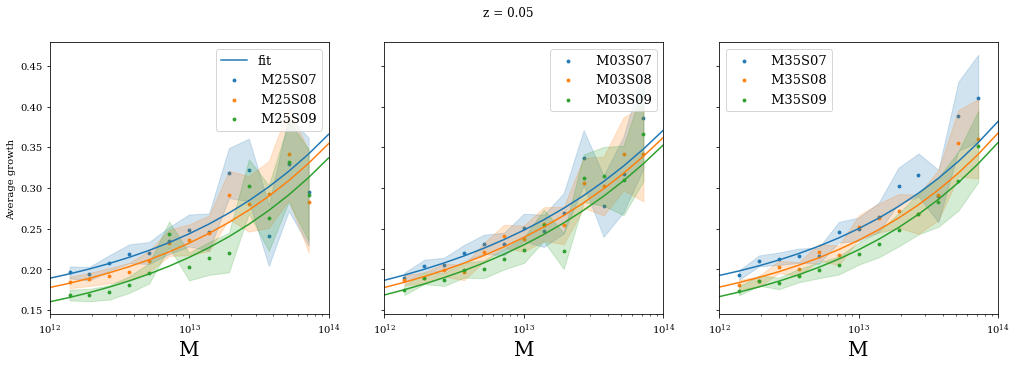

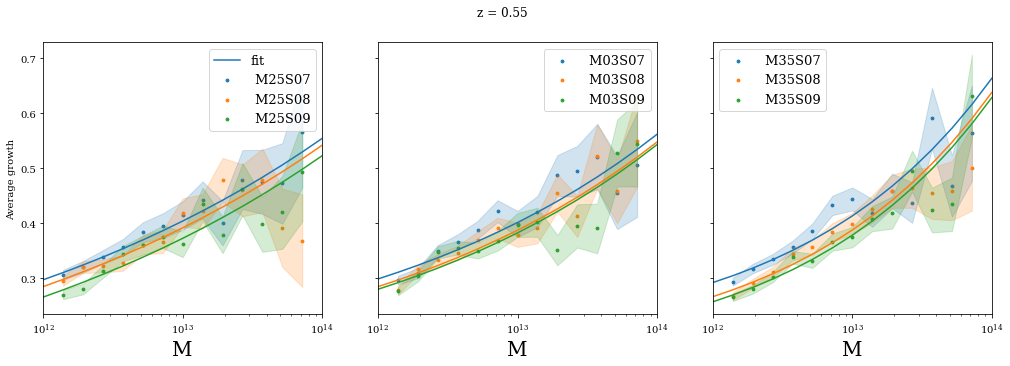

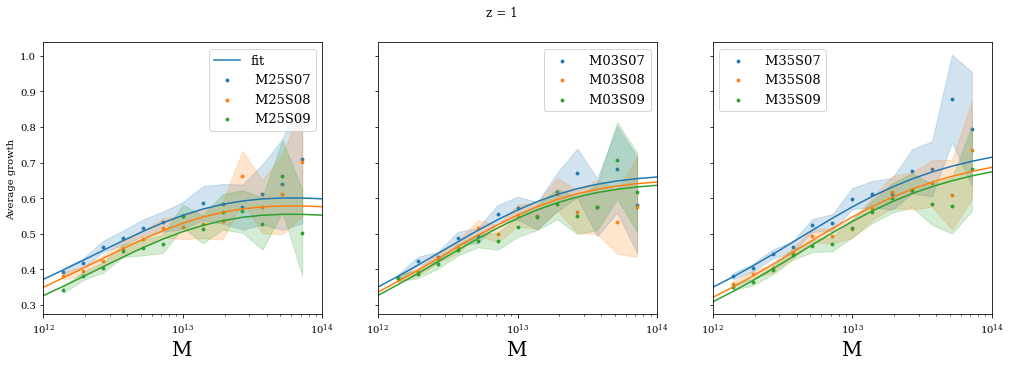

In [27]:
prefixes = ['M25S07','M03S07', 'M35S07','M25S08','M03S08', 'M35S08', 'M25S09','M03S09', 'M35S09']

nbins = 15
lmmin = 12
lmmax = 14
masses = np.logspace(lmmin, lmmax, nbins)

zfs = [0.05, 0.55, 1]
save = True


ps, errors = {}, {}
p0 = [ 0.11]
p0s = np.zeros((len(zfs), len(prefixes)))

for i in range(len(zfs)):
    zf = zfs[i]
    
    fig, axs = plt.subplots(1,3, figsize=[17, 5], sharex=True, sharey=True)
    for n in range(len(prefixes)):
        sim_name = prefixes[n]
        om, s8 = sims[sim_name]
        simt = sm.Simulation(sim_name, om, s8, path=path)
        pars = np.loadtxt('./fit_params/av_growth_params_m{:2.0f}x_z{}_pl.txt'.format(100*om, zf))
        
        if zf==1:
            def new_f(M, A, M0, alpha, beta, p):
                return A*(1+M/M0)**alpha*(M/M0)**beta + p
            def f(M, p):
                return new_f(M, pars[0], pars[1], pars[2], pars[3], p)
        else:
            def new_f(M, A, M0, beta, p):
                return A*(M/M0)**beta + p
            def f(M, p):
                return new_f(M, pars[0], pars[1], pars[2], p)

        res_sim, ntot_sim, ps_sim = simt.average_growth(zf, mbins=15, save=False)
        zs, dz = sm.get_zlastdyn(zf, h=0.7, om=simt.om0, zbins=20)
        par, _ = curve_fit(f, masses[1:], res_sim[1:]/ntot_sim[1:], p0=p0, sigma=np.sqrt(res_sim[1:])/ntot_sim[1:])
        
        p0s[i,n] = par[0]
        ps[('m{:2.0f}'.format(100*om), 's{:1.0f}'.format(100*s8), 'z{}'.format(zf))]=par[0]

        errors[('m{:2.0f}'.format(100*om), 's{:1.0f}'.format(100*s8), 'z{}'.format(zf))] = np.sqrt(res_sim[1:-1])/ntot_sim[1:-1]**1.5
        axs[n%3].plot(masses, f(masses, par[0]), color='C{}'.format(n//3), label='fit'[:3*(n==0)])
        axs[n%3].scatter(masses[1:-1], res_sim[1:-1]/ntot_sim[1:-1], s=8, color='C{}'.format(n//3), label=r' {}'.format(sim_name))
        axs[n%3].fill_between(masses[1:-1], res_sim[1:-1]/ntot_sim[1:-1] - np.sqrt(res_sim[1:-1])/ntot_sim[1:-1], res_sim[1:-1]/ntot_sim[1:-1] + np.sqrt(res_sim[1:-1])/ntot_sim[1:-1], color='C{}'.format(n//3), alpha=0.2)
        axs[n%3].set_xscale('log')
        axs[n%3].set_xlabel('M', size=20)
        axs[n%3].legend()
        axs[n%3].set_xlim(1e12, 1e14)
    axs[0].set_ylabel('Average growth')
    fig.suptitle('z = {}'.format(zf))
    
    

### Save the poissonian errors with 

In [28]:
with open('./data/ps_average_growth.pkl', 'wb') as fp:
    pickle.dump(ps, fp)
    print('dictionary saved successfully to file')
with open('./data/errors_average_growth.pkl', 'wb') as fp:
    pickle.dump(errors, fp)
    print('dictionary saved successfully to file')


dictionary saved successfully to file
dictionary saved successfully to file


# Getting the bootstrap errors 

## Large growth  

In [34]:
prefixes = ['M25S07','M03S07', 'M35S07','M25S08','M03S08', 'M35S08', 'M25S09','M03S09', 'M35S09']

nbins = 15
lmmin = 12
lmmax = 14
masses = np.logspace(lmmin, lmmax, nbins)

zfs = [0.05, 0.55, 1]

def new_f(M, A, M0, beta, p):
    return A*(M/M0)**beta + p
ps, errors = {}, {}
p0 = [ 0.11, 0.11, 0.27]
p0s = np.zeros((len(zfs), len(prefixes)))

nsamples = 100
scatter_p0 = np.zeros((len(zfs), len(prefixes), nsamples))
for b in range(nsamples):
    for i in range(len(zfs)):
        zf = zfs[i]
        for n in range(len(prefixes)):
            sim_name = prefixes[n]
            om, s8 = sims[sim_name]
            simt = sm.Simulation(sim_name, om, s8, path=path)
            pars = np.loadtxt('./fit_params/large_growth_params_m{:2.0f}x_z{}_pl.txt'.format(100*om, zf))
            def f(M, p):
                return new_f(M, pars[0], pars[1], pars[2], p)
            res_sim, ntot_sim, ps_sim = simt.large_growth(zf, mbins=15, save=False, subsample=0.5)
            zs, dz = sm.get_zlastdyn(zf, h=0.7, om=simt.om0, zbins=20)
            try:
                par, _ = curve_fit(f, masses[1:], res_sim[1:]/ntot_sim[1:], p0=p0[i], sigma=np.sqrt(res_sim[1:])/ntot_sim[1:])
                scatter_p0[i,n,b] = par[0]            
            except ValueError:
                scatter_p0[i,n,b] = p0[i]


In [36]:
save = True
if save:
    np.save('./data/large_growth_error_scatter.npy', scatter_p0)
else:
    scatter_p0 = np.load('./data/large_growth_error_scatter.npy')
    


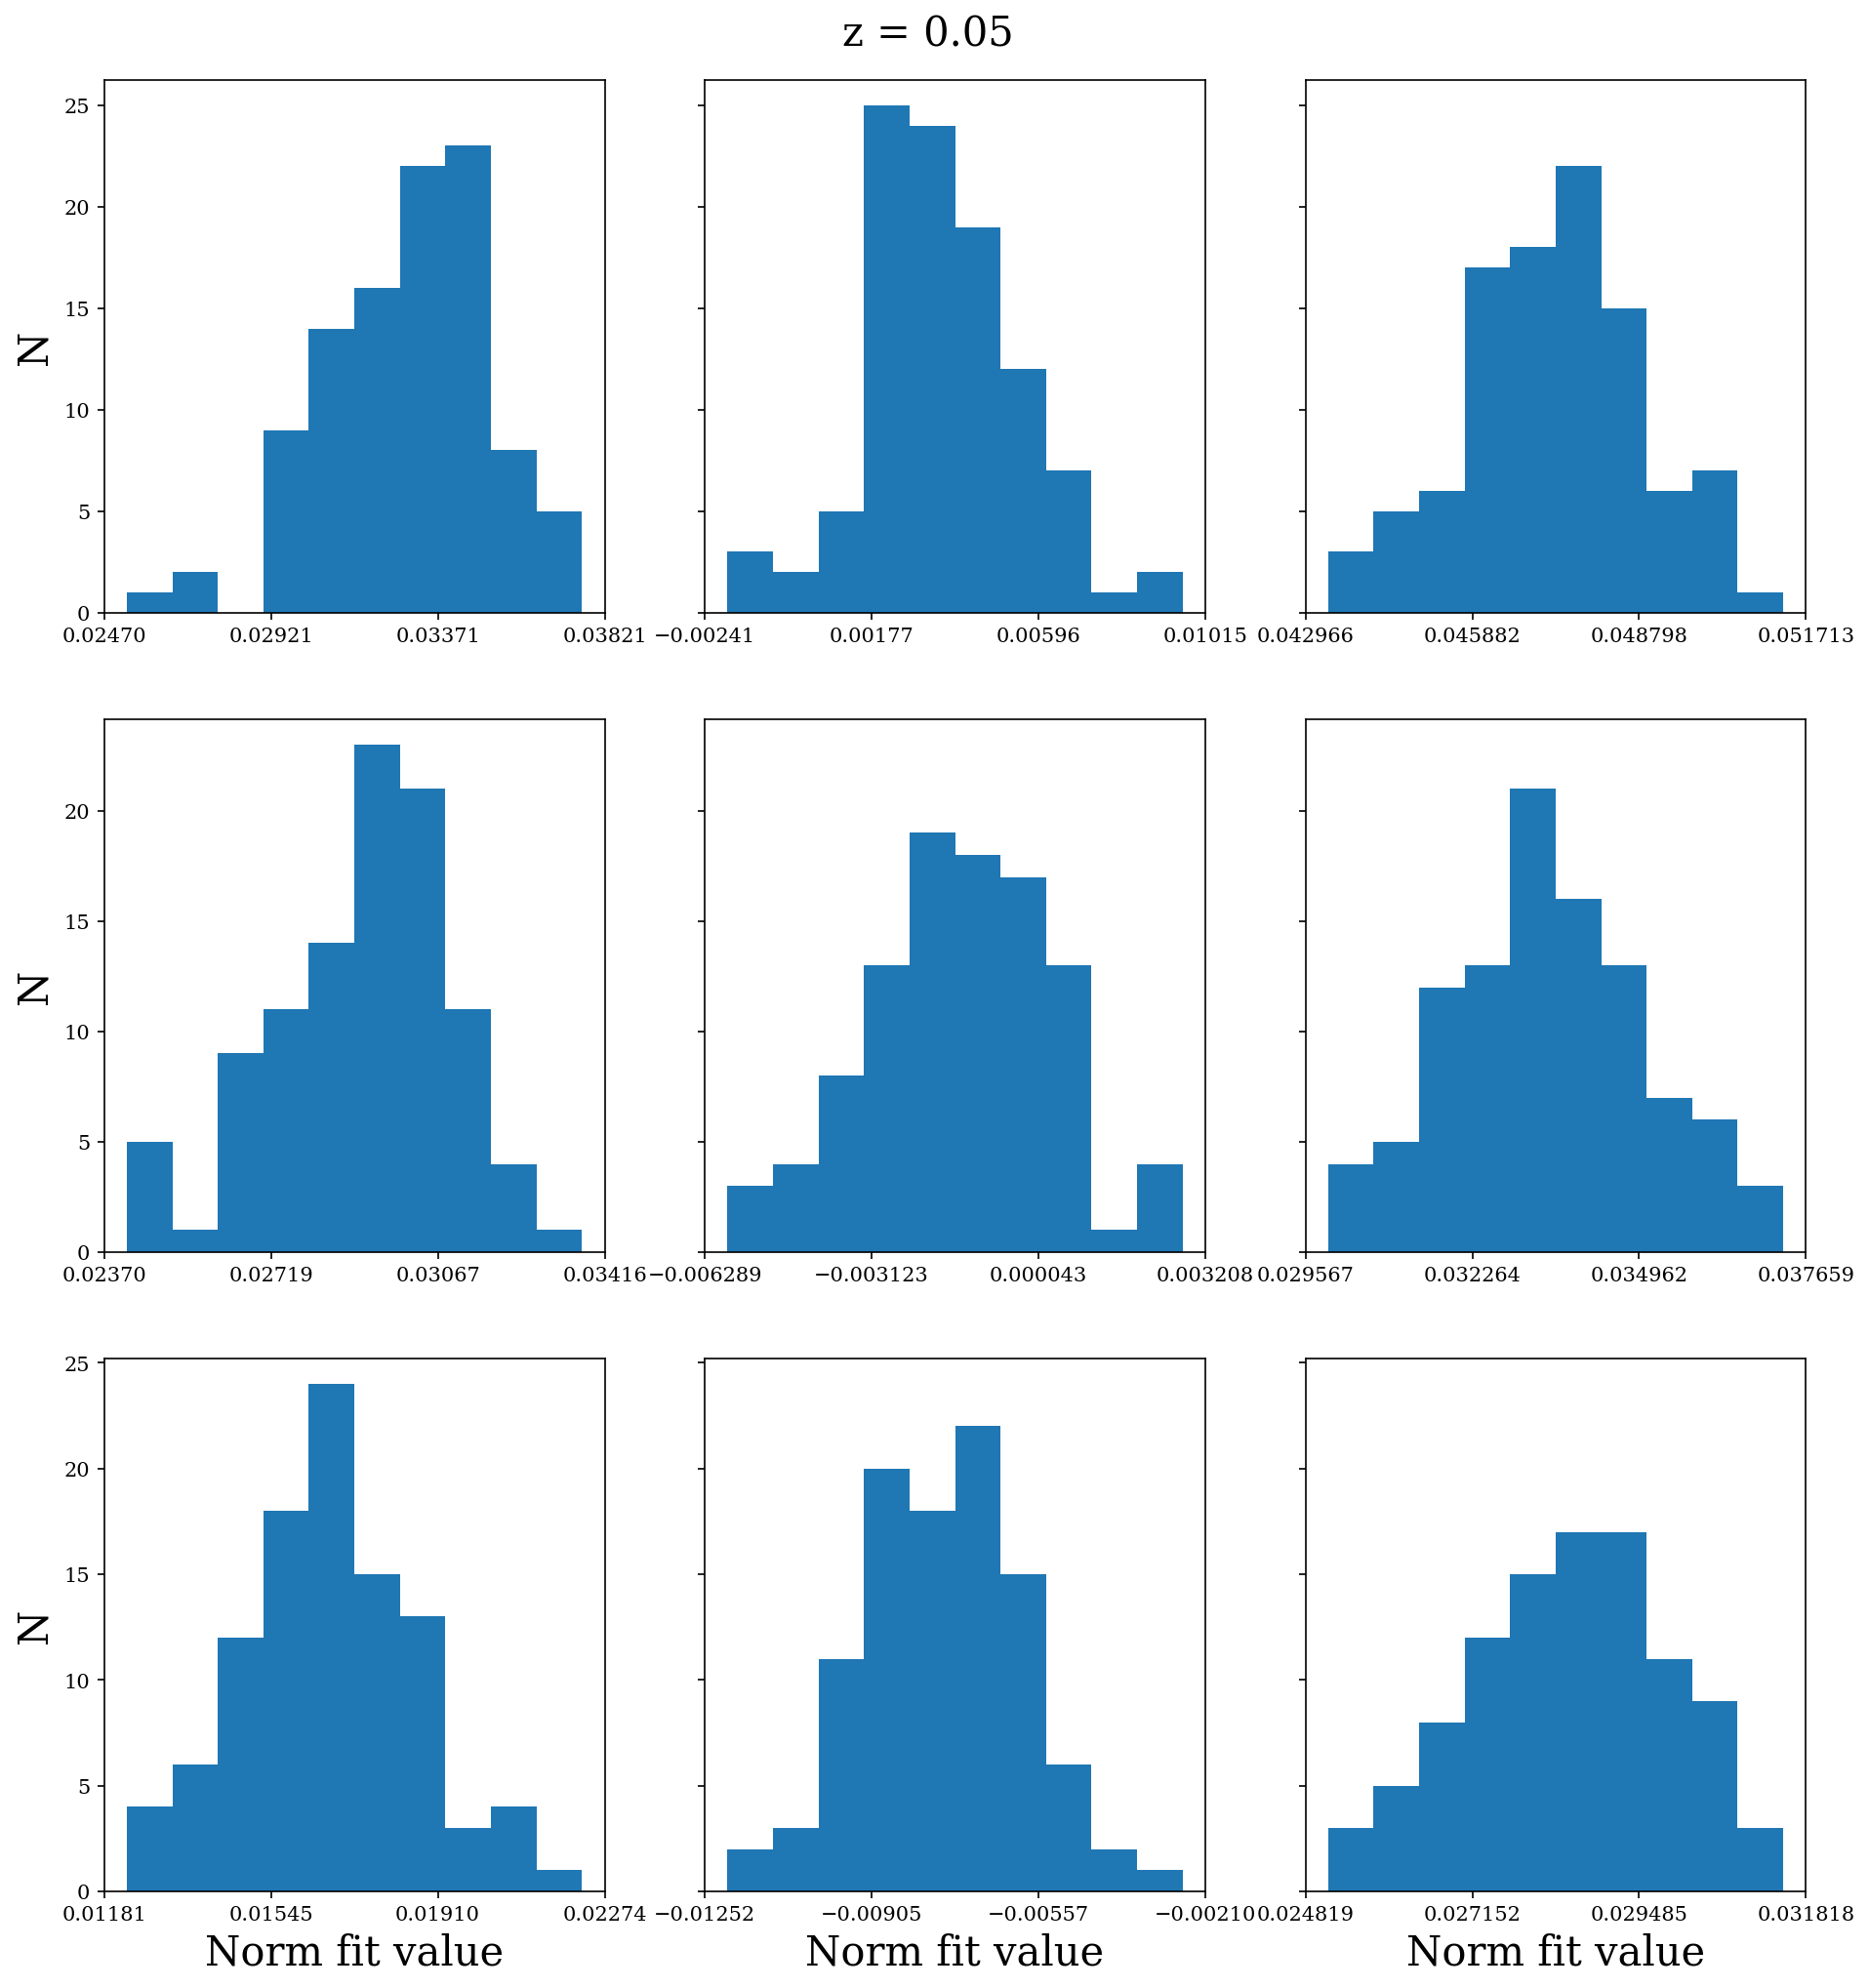

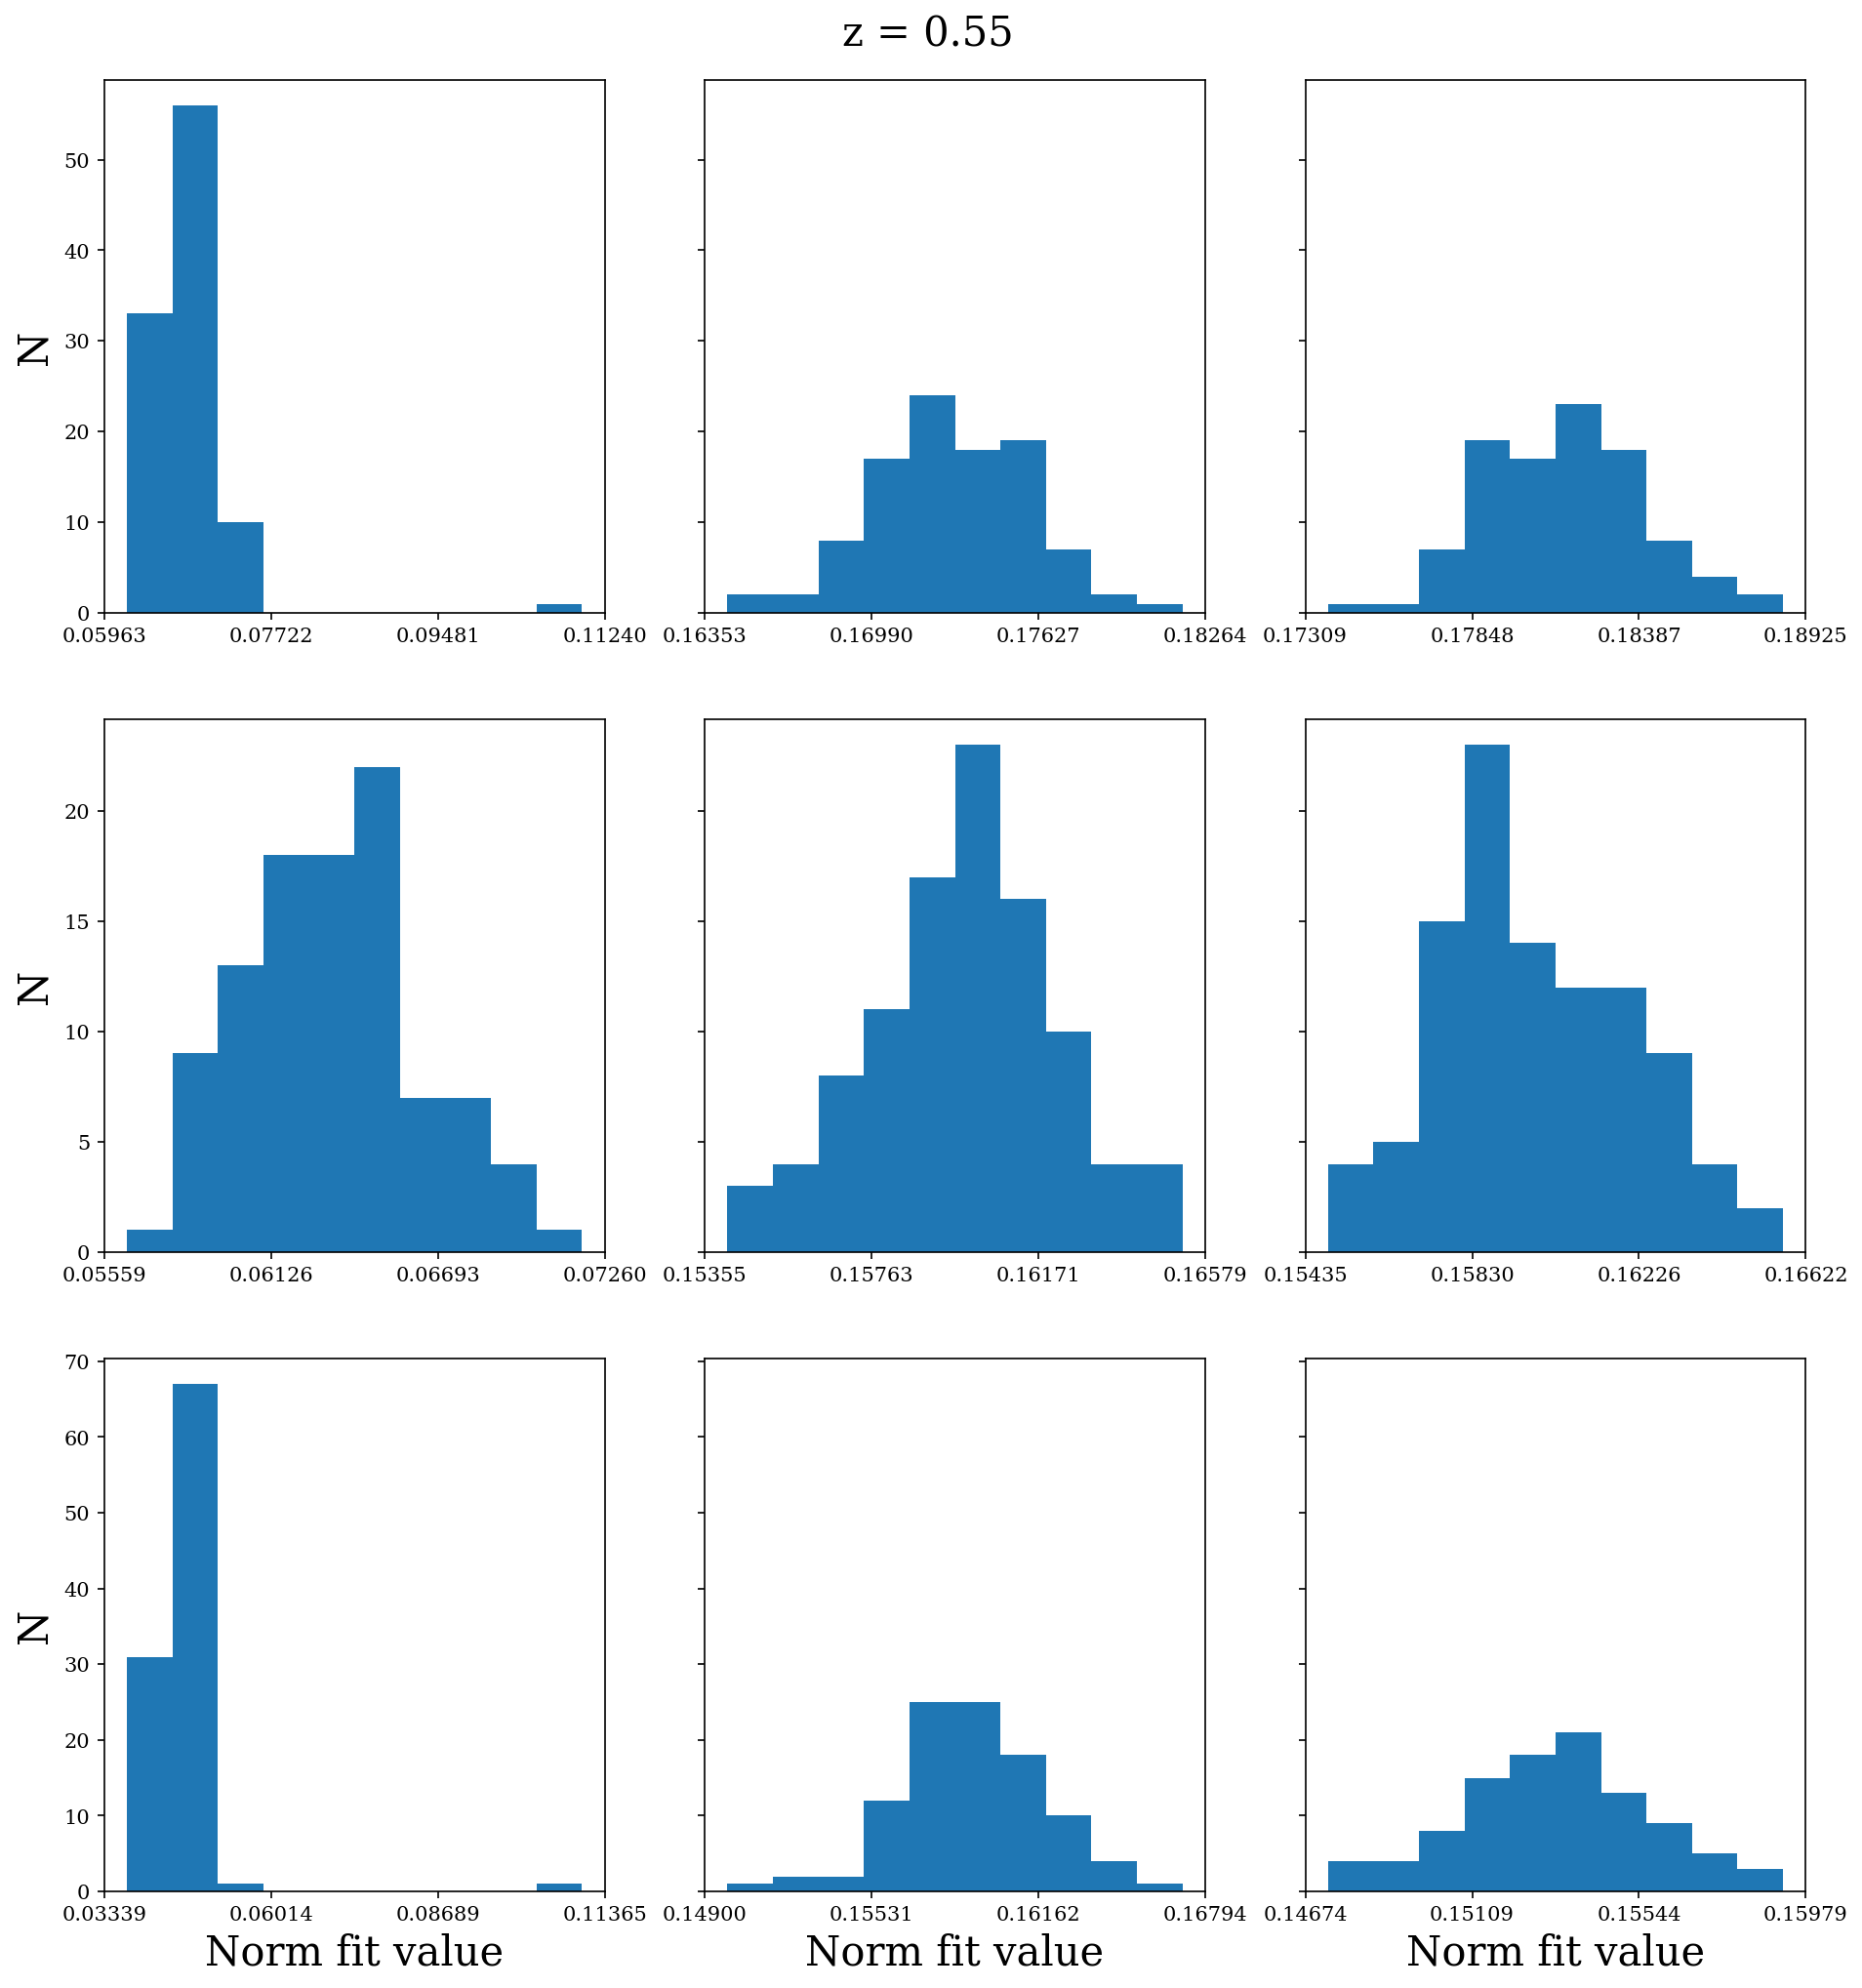

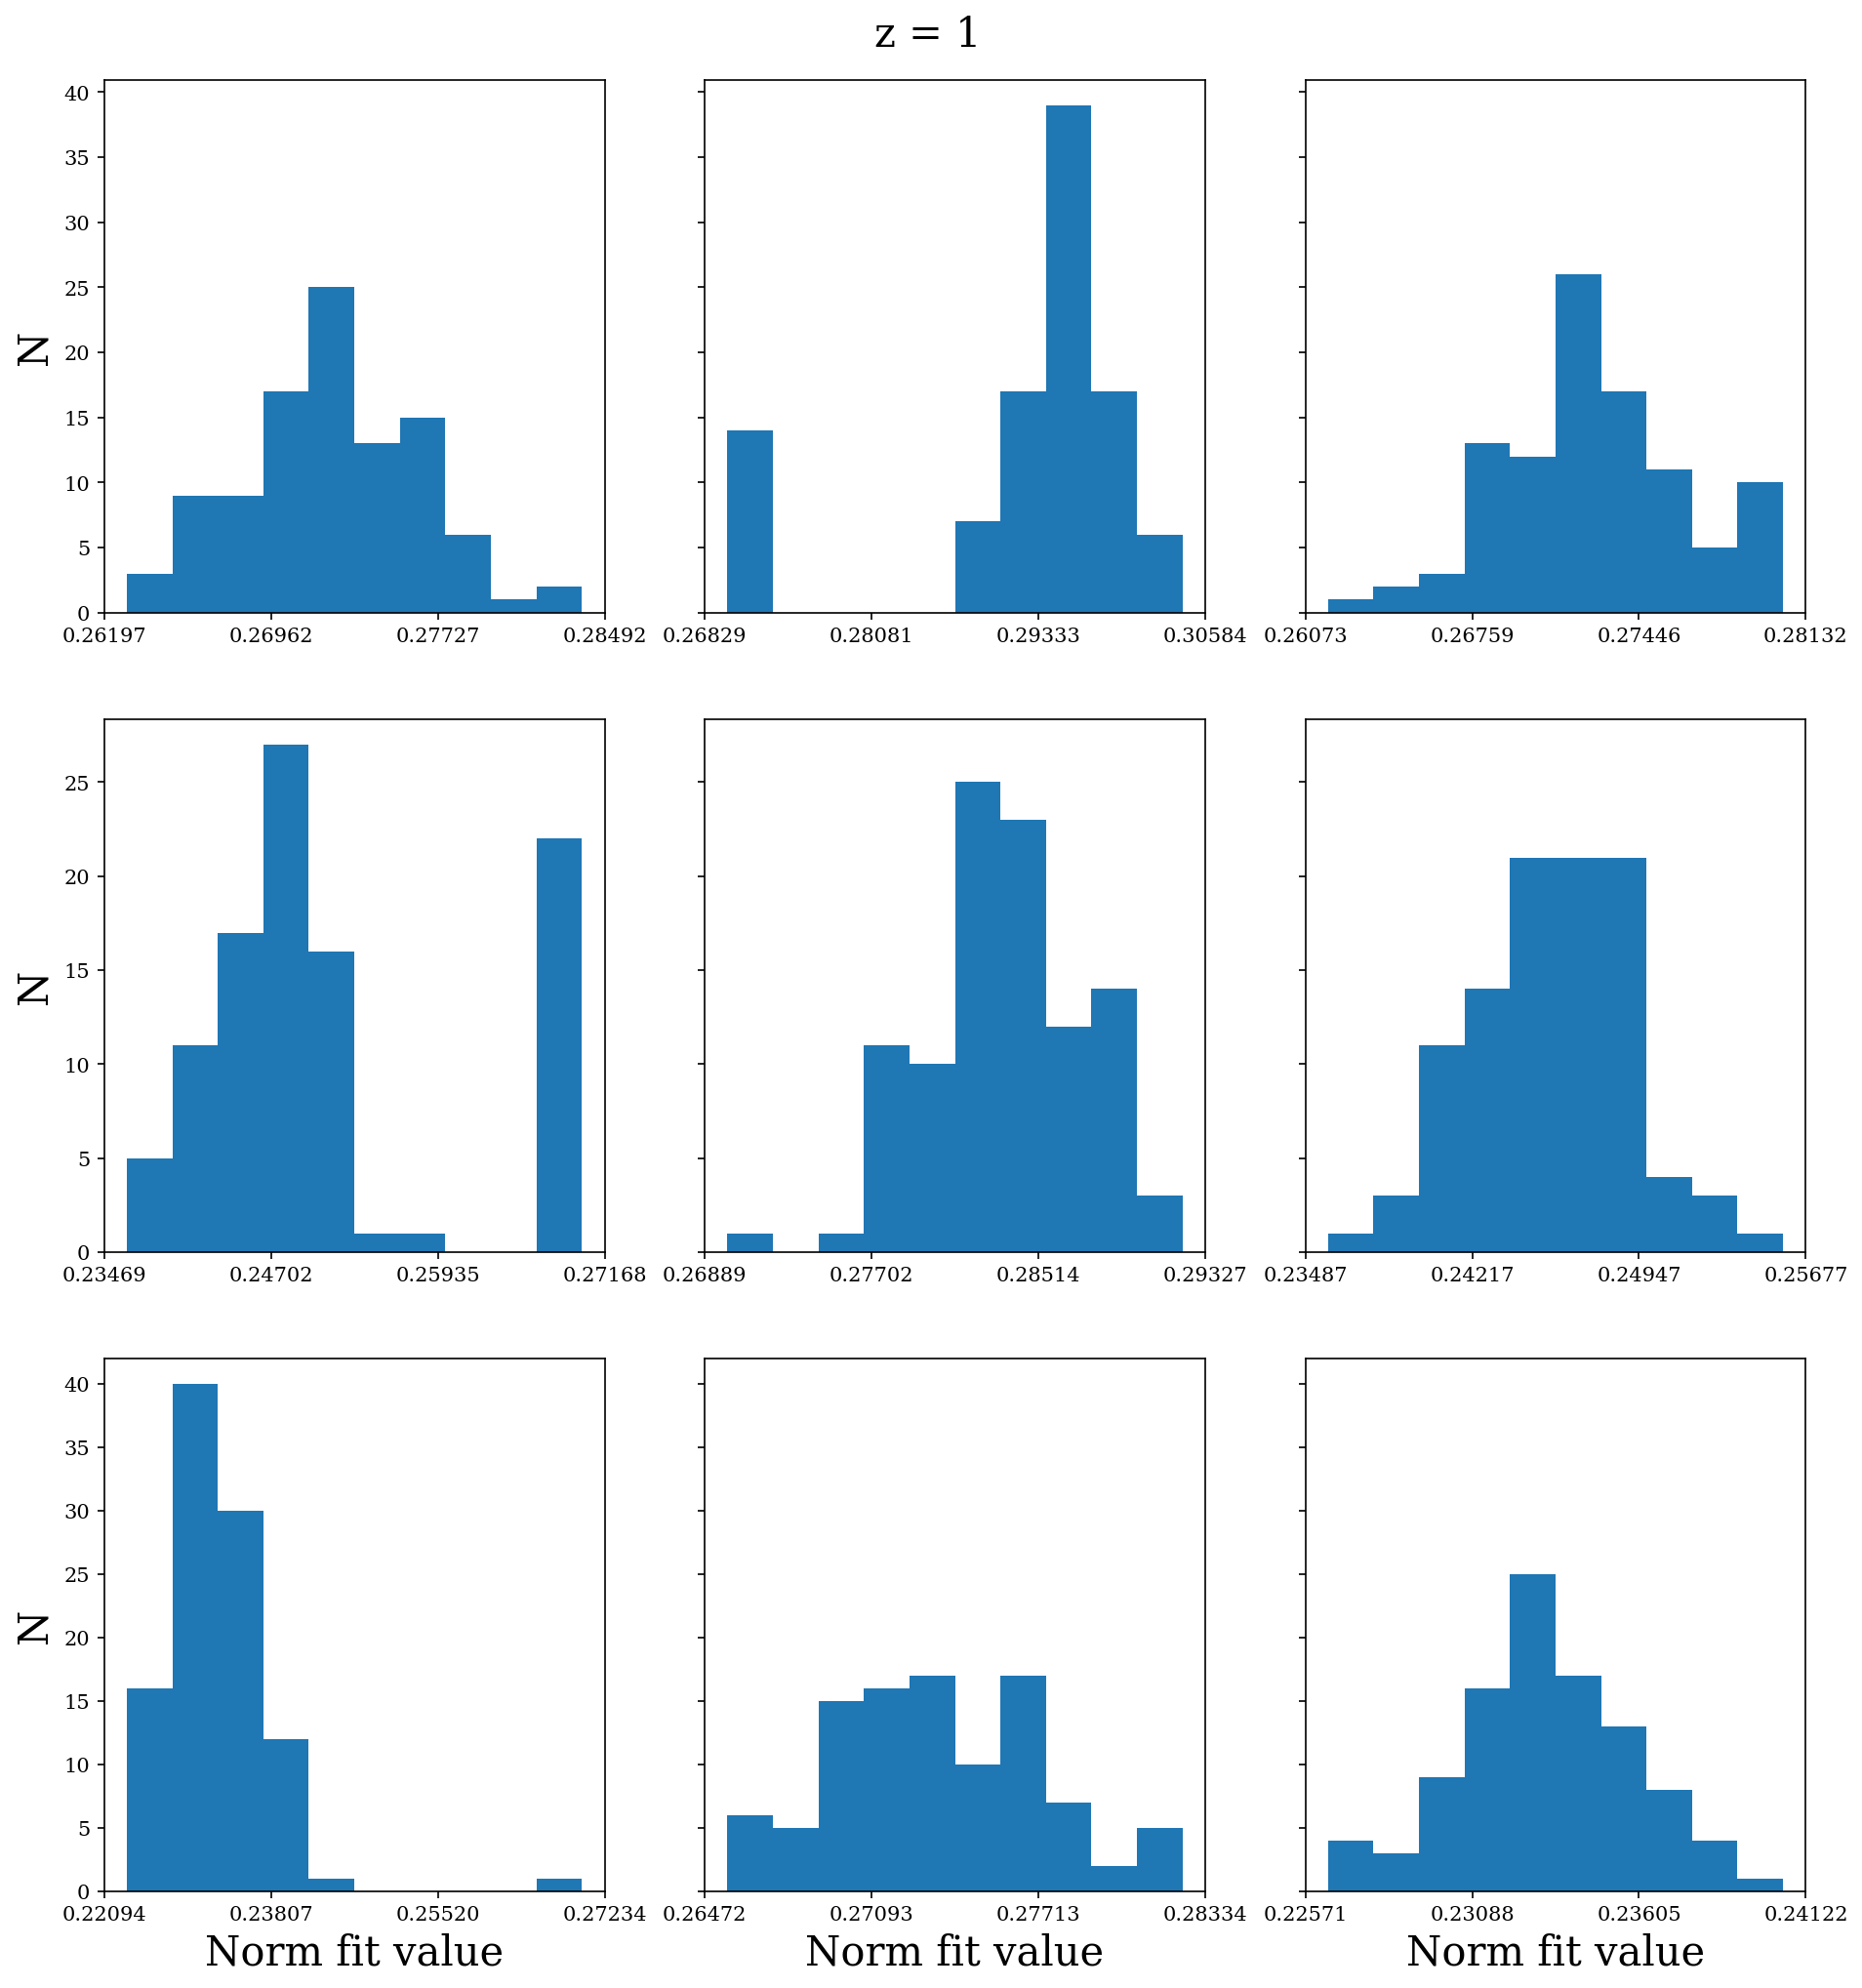

In [35]:
zfs = [0.05, 0.55, 1]
for i in range(3):
    fig, axs = plt.subplots(3,3, figsize=[15, 15], sharex=False, sharey='row')
    for j in range(9):
        axs[j//3,j%3].hist(scatter_p0[i,j])
        axs[j//3,j%3].xaxis.set_major_locator(ticker.LinearLocator(numticks=4))
        axs[2, j%3].set_xlabel('Norm fit value', size=20)
        axs[j//3, 0].set_ylabel('N', size=20)
    fig.suptitle('z = {}'.format(zfs[i]), size=20)
    plt.subplots_adjust(top=0.95)

## Average growth 

In [18]:
prefixes = ['M25S07','M03S07', 'M35S07','M25S08','M03S08', 'M35S08', 'M25S09','M03S09', 'M35S09']

nbins = 15
lmmin = 12
lmmax = 14
masses = np.logspace(lmmin, lmmax, nbins)

zfs = [0.05, 0.55, 1]

p0 = [ 0.11]
p0s = np.zeros((len(zfs), len(prefixes)))

nsamples = 100
scatter_p0 = np.zeros((len(zfs), len(prefixes), nsamples))
for b in range(nsamples):
    for i in range(len(zfs)):
        zf = zfs[i]
        for n in range(len(prefixes)):
            sim_name = prefixes[n]
            om, s8 = sims[sim_name]
            simt = sm.Simulation(sim_name, om, s8, path=path)
            pars = np.loadtxt('./fit_params/av_growth_params_m{:2.0f}x_z{}_pl.txt'.format(100*om, zf))
            if zf==1:
                def new_f(M, A, M0, alpha, beta, p):
                    return A*(1+M/M0)**alpha*(M/M0)**beta + p
                def f(M, p):
                    return new_f(M, pars[0], pars[1], pars[2], pars[3], p)
            else:
                def new_f(M, A, M0, beta, p):
                    return A*(M/M0)**beta + p
                def f(M, p):
                    return new_f(M, pars[0], pars[1], pars[2], p)
            res_sim, ntot_sim, ps_sim = simt.average_growth(zf, mbins=15, save=False, subsample=0.5)
            zs, dz = sm.get_zlastdyn(zf, h=0.7, om=simt.om0, zbins=20)
            try:
                par, _ = curve_fit(f, masses[1:], res_sim[1:]/ntot_sim[1:], p0=p0, sigma=np.sqrt(res_sim[1:])/ntot_sim[1:])
            except ValueError: 
                par = p0
            scatter_p0[i,n,b] = par[0]

In [5]:
save = False
if save:
    np.save('./data/average_growth_error_scatter.npy', scatter_p0)
else:
    scatter_p0 = np.load('./data/average_growth_error_scatter.npy')

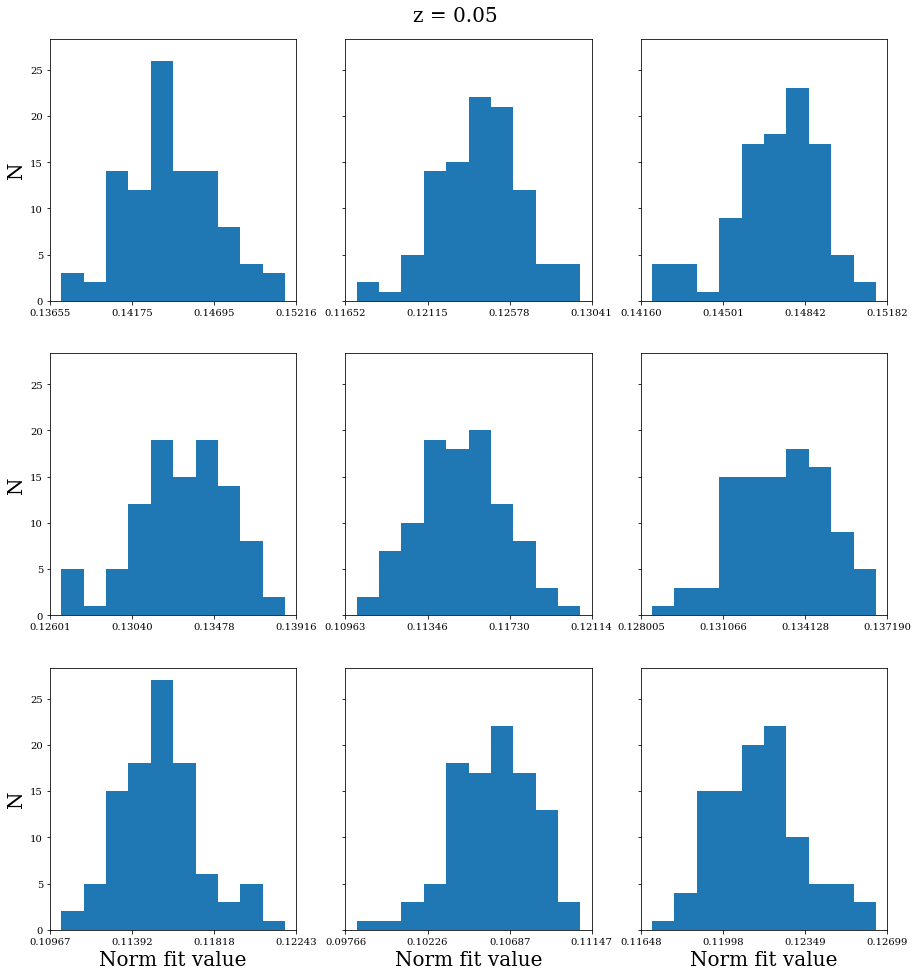

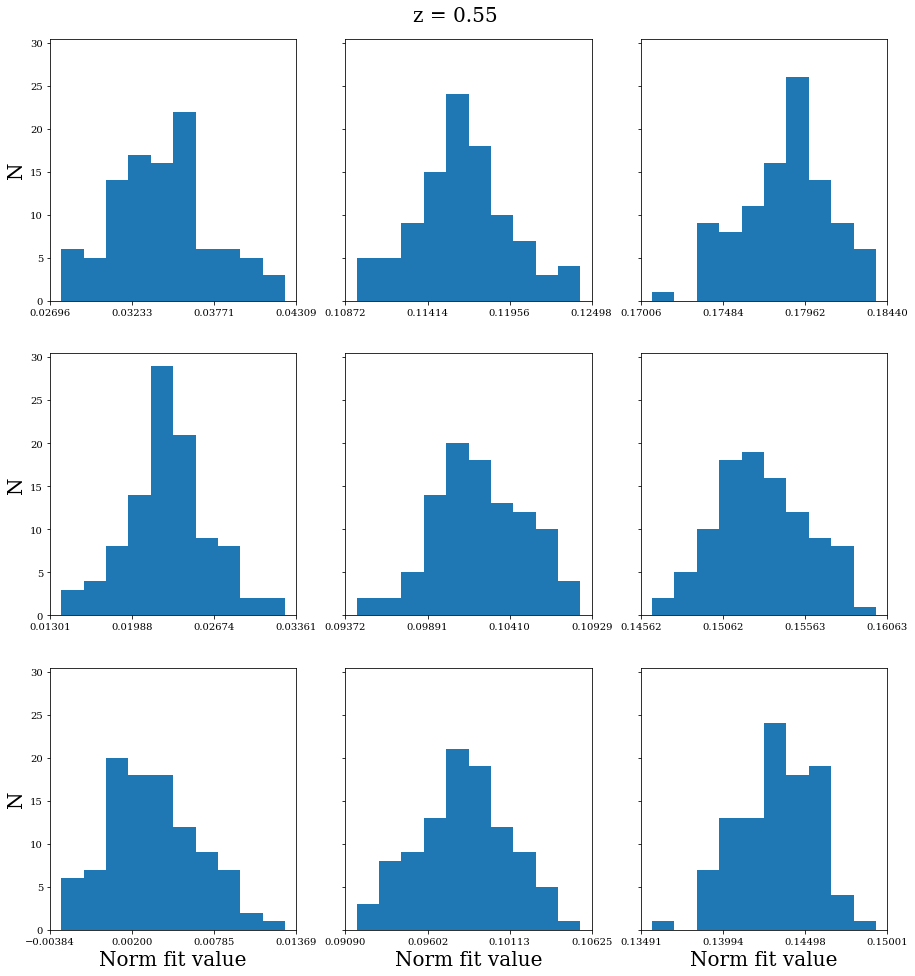

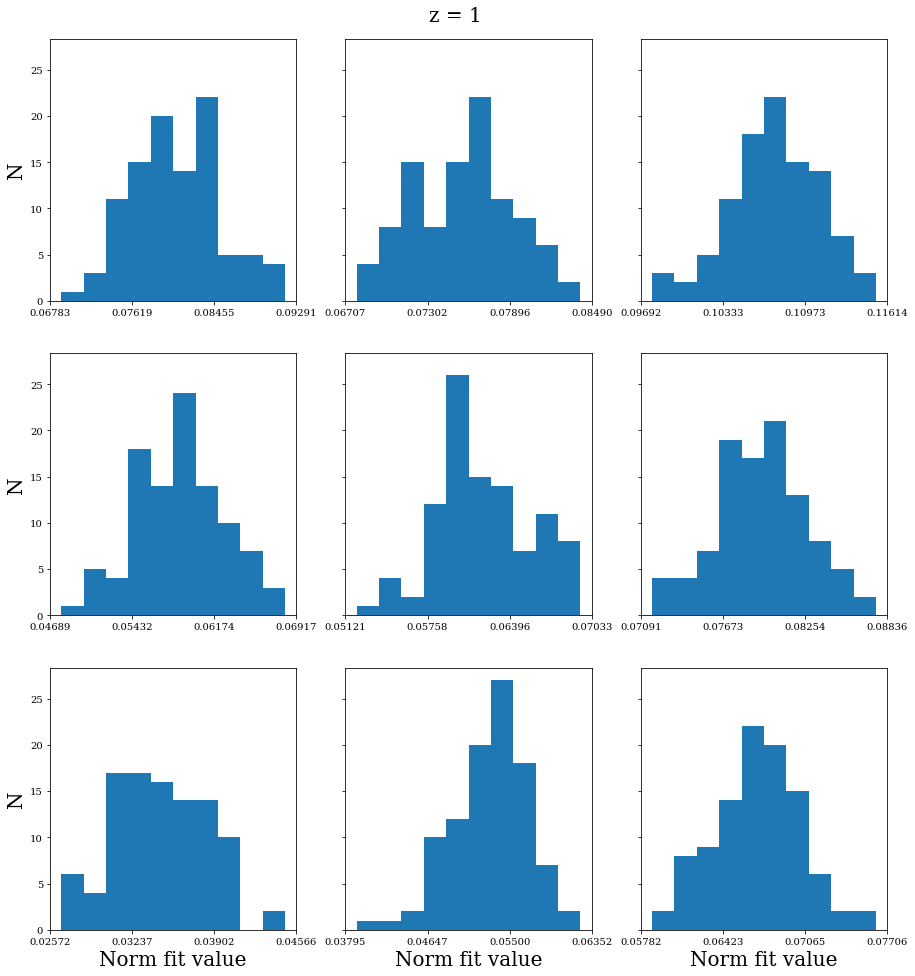

In [15]:
zfs = [0.05, 0.55, 1]
for i in range(3):
    fig, axs = plt.subplots(3,3, figsize=[15, 15], sharex=False, sharey='row')
    for j in range(9):
        axs[j//3,j%3].hist(scatter_p0[i,j])
        axs[j//3,j%3].xaxis.set_major_locator(ticker.LinearLocator(numticks=4))
        axs[2, j%3].set_xlabel('Norm fit value', size=20)
        axs[j//3, 0].set_ylabel('N', size=20)
    fig.suptitle('z = {}'.format(zfs[i]), size=20)
    plt.subplots_adjust(top=0.95)

# Simulation vs Analytical vs Cosmology

## Average growth 

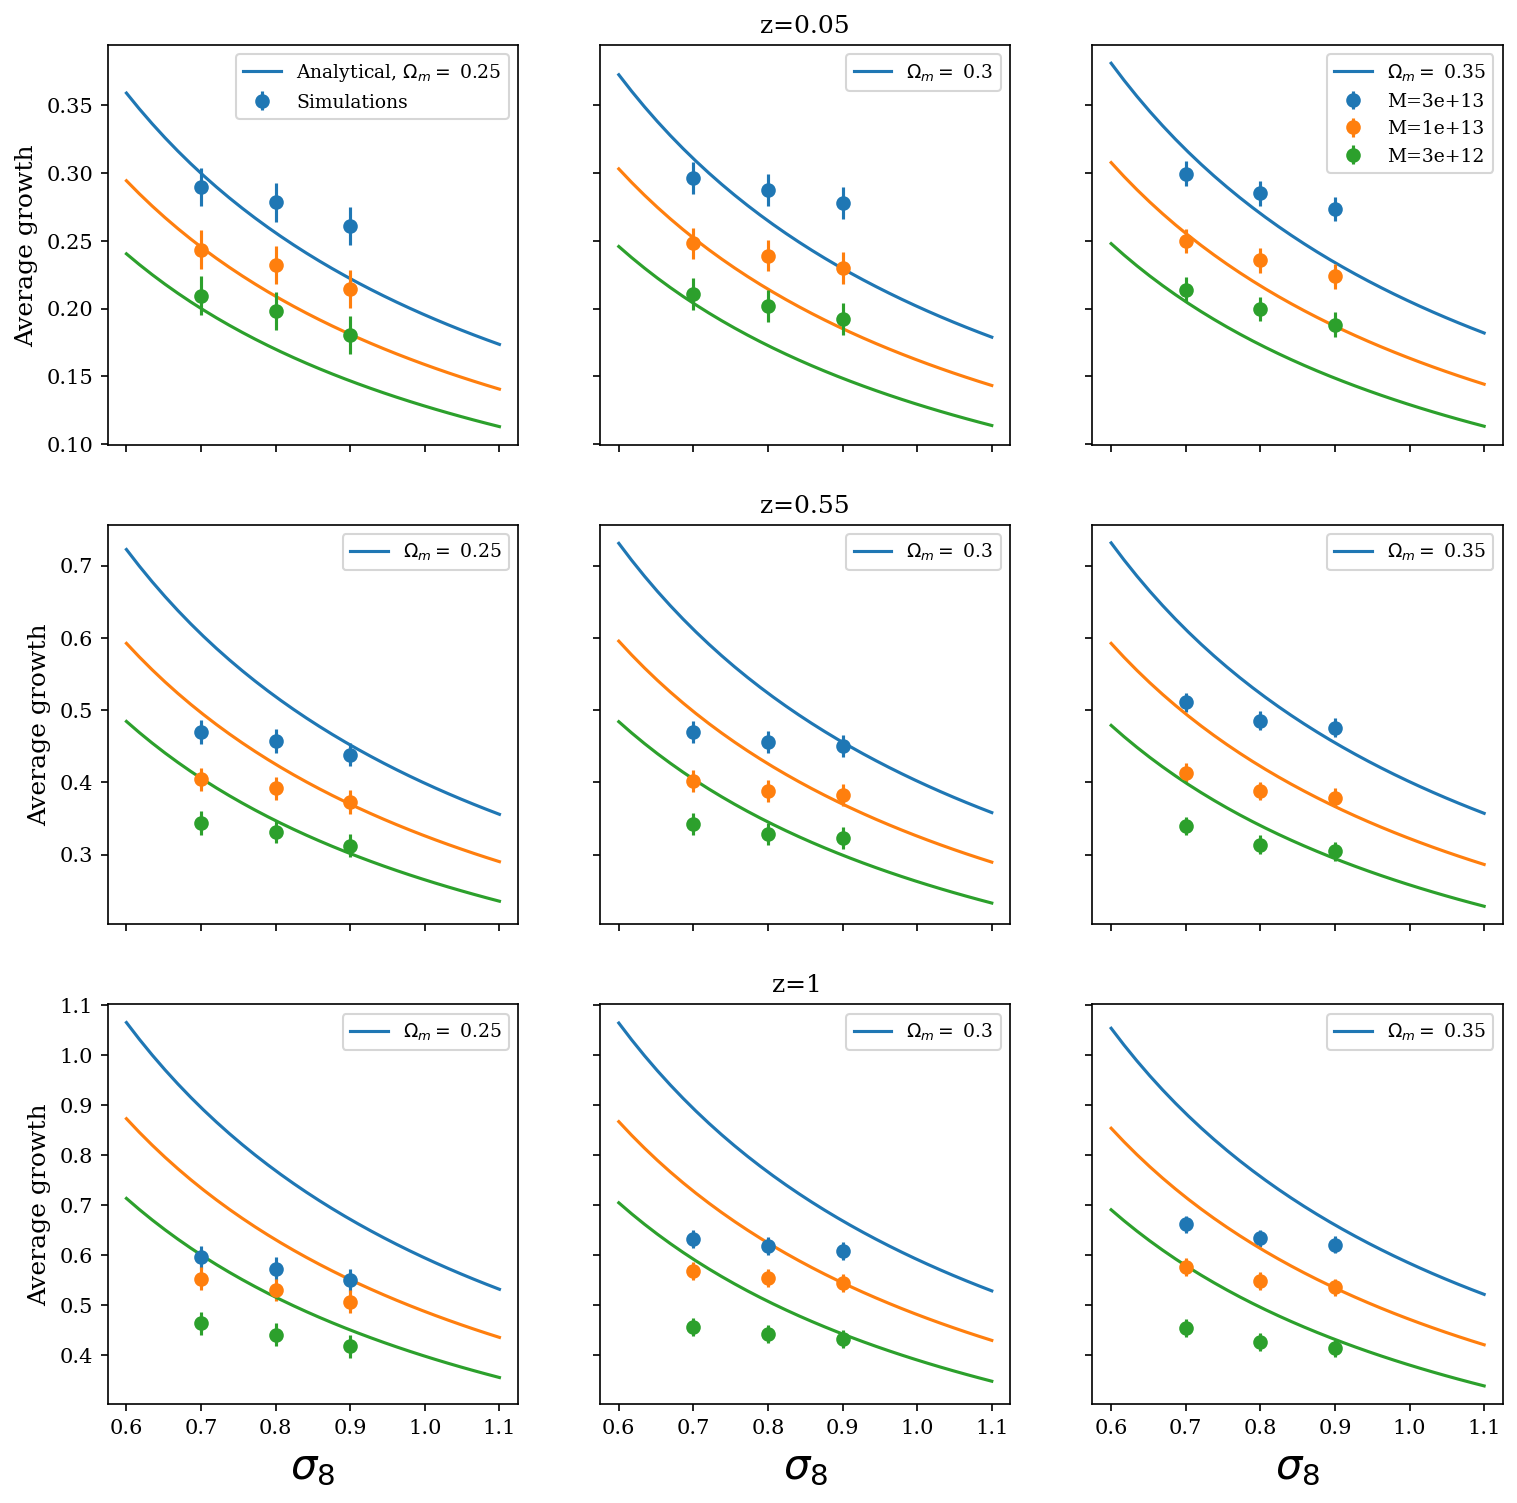

In [25]:
scatter_p0 = np.load('./data/average_growth_error_scatter.npy')
rms = np.std(scatter_p0, axis=2)
omegas = [0.25,0.3,0.35]
sigmas = np.linspace(0.6, 1.1, 30)
Masses = [3e13, 1e13, 3e12]

zfs = [0.05, 0.55, 1]
sim_names = [['M25S07', 'M25S08', 'M25S09'], ['M03S07', 'M03S08', 'M03S09'], ['M35S07', 'M35S08', 'M35S09']]
fig, axs = plt.subplots(3,3, figsize=(12,12), sharex=True, sharey='row')

with open('./data/ps_average_growth.pkl', 'rb') as fp:
    ps = pickle.load(fp)

with open('./data/errors_average_growth.pkl', 'rb') as fp:
    errors = pickle.load(fp)
save=True    
for l in range(len(Masses)):
    Mass = Masses[l]
    for i in range(len(zfs)):
        zf = zfs[i]
        for k in range(len(sim_names)):
            sims_o = sim_names[k]
            om = sims[sims_o[0]][0]
            pars = np.loadtxt('./fit_params/av_growth_params_m{:2.0f}x_z{}_pl.txt'.format(100*om, zf))
            
            if zf==1:
                def new_f(M, A, M0, alpha, beta, p):
                    return A*(1+M/M0)**alpha*(M/M0)**beta + p
                def f(M, p):
                    return new_f(M, pars[0], pars[1], pars[2], pars[3], p)
            else: 
                def new_f(M, A, M0, beta, p):
                    return A*(M/M0)**beta + p
                def f(M, p):
                    return new_f(M, pars[0], pars[1], pars[2], p)
            
            simres, err_res, errtop, errbot = [], [], [], []
            for sim in sims_o:
                s8 = sims[sim][1]
                norm = ps[('m{:2.0f}'.format(100*om), 's{:1.0f}'.format(100*s8), 'z{}'.format(zf))]
                simres.append(f(Mass, norm))
                #idx = np.min(np.where(masses>Mass))
                errtop.append(f(Mass, norm+5*rms[i,k]))
                errbot.append(f(Mass, norm-5*rms[i,k]))
            zs, dz = sm.get_zlastdyn(zf, om=om, h=0.7, zbins=50)
            if save:
                fres = []
                for sig in sigmas:
                    fres.append(sm.average_growth_analytical(Mass, zs, s8=sig, om=om))
                np.save('./data/average_growth_fres_{:1.0e}_{:1.2f}_{}.npy'.format(Mass, zf, 100*om), np.array(fres))
            else:
                 fres = np.load('./data/average_growth_fres_{:1.0e}_{:1.2f}_{}.npy'.format(Mass, zf, 100*om))
            axs[i,k].plot(sigmas, fres, color='C{}'.format(l), label='Analytical, '[:13*(i==0)*(k==0)*(l==0)] +r'$\Omega_m=$ {}'.format(om)[:17*(l==0)])
            #axs[i,k].errorbar([0.7,0.8,0.9], simres, err_res, fmt ='o', color='C{}'.format(l), label='Simulations'[:11*(i==0)*(k==0)*(l==0)] + 'M={:1.0e}'.format(Mass)[:7*(i==0)*(k==2)])
            axs[i,k].errorbar([0.7,0.8,0.9], simres, [np.array(simres)-np.array(errbot), np.array(errtop)-np.array(simres)], fmt ='o', color='C{}'.format(l), label='Simulations'[:11*(i==0)*(k==0)*(l==0)] + 'M={:1.0e}'.format(Mass)[:7*(i==0)*(k==2)])

            axs[i,k].legend()
            axs[i,k].set_xlabel(r'$\sigma_8$'[:10*(i==2)], size=20)
            axs[i,k].set_ylabel('Average growth'[:14*(k==0)], size=12)
            axs[i,k].set_title('z={}  '.format(zf)[:6*(k==1)])
plt.savefig('./figs/av_growth_cosmo.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.savefig('./figs/av_growth_cosmo.png', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
  

## Large growth 

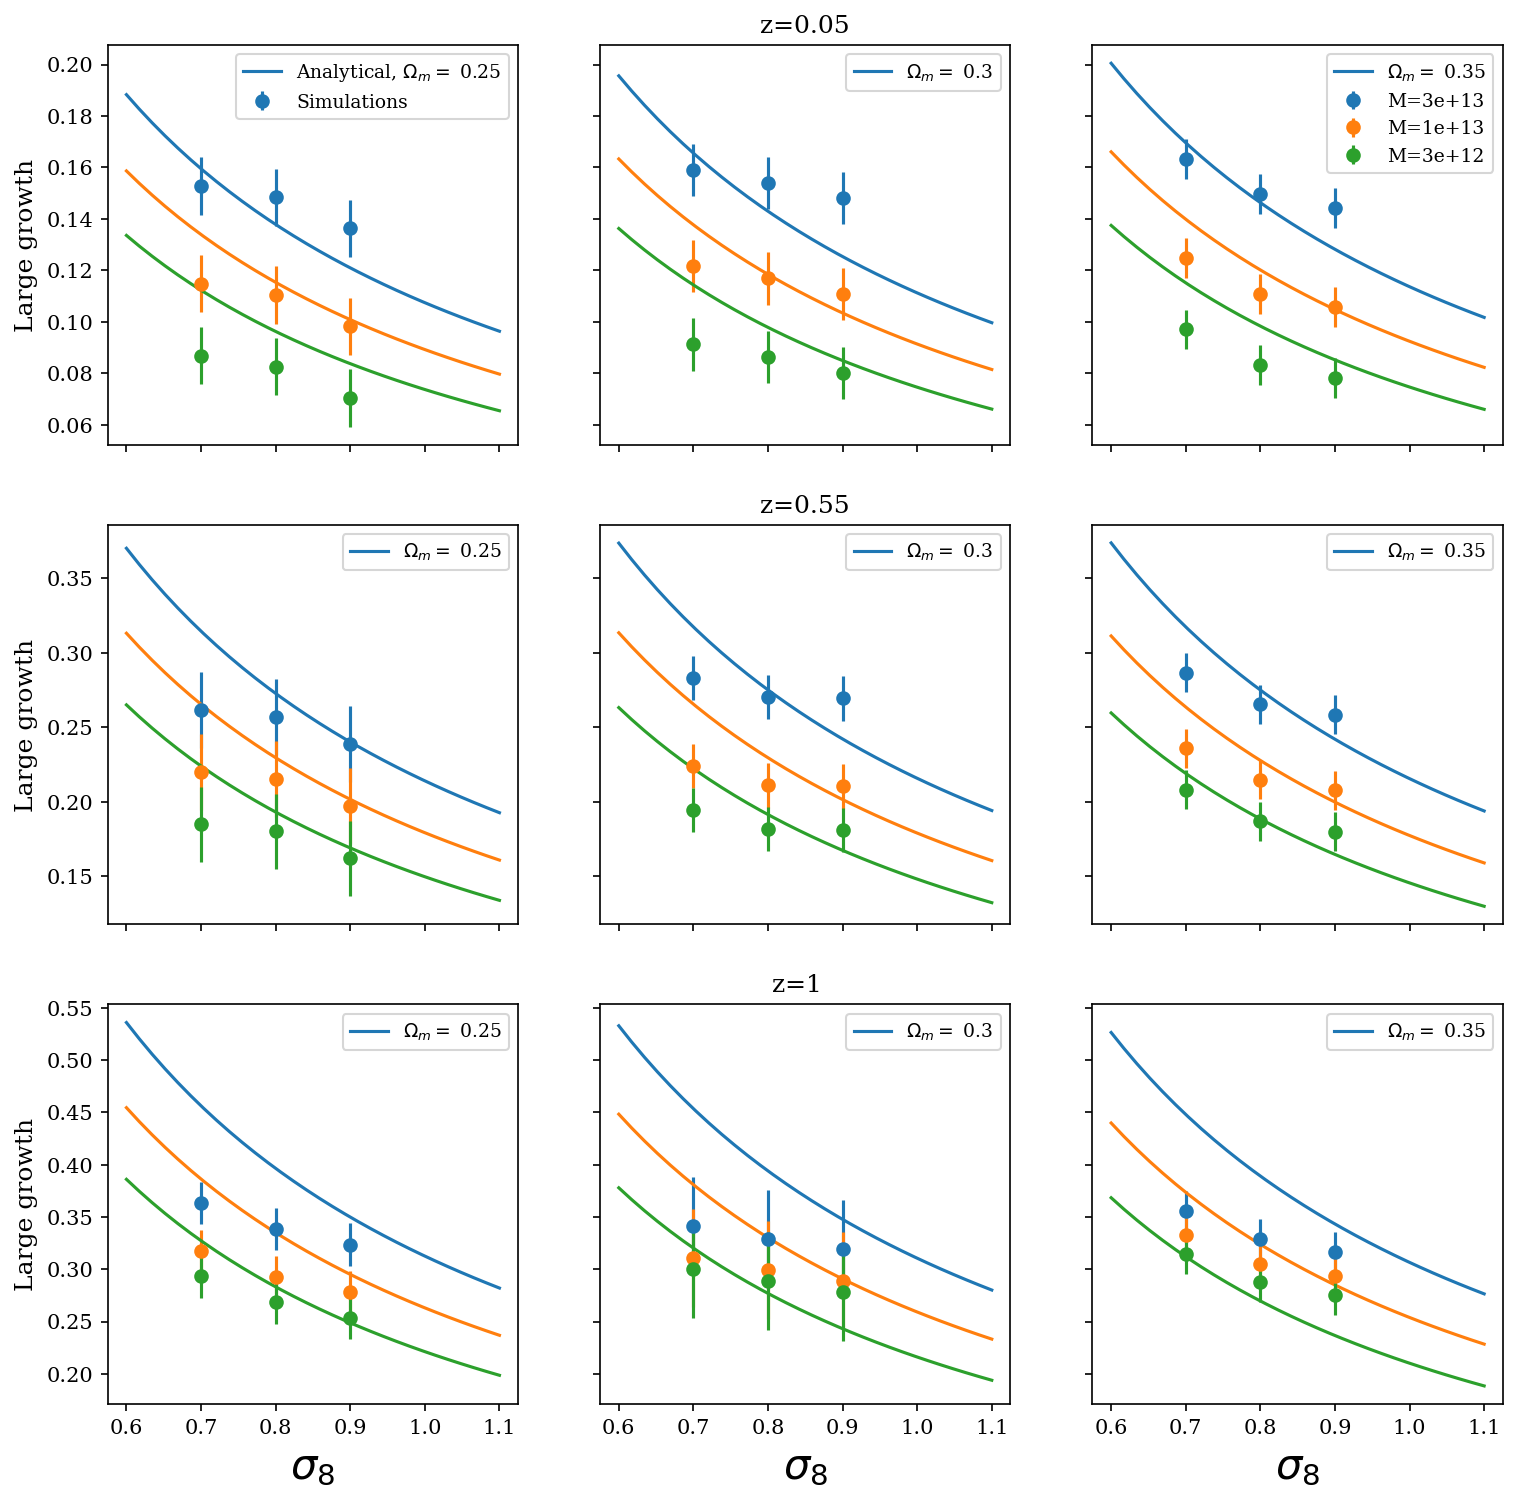

In [39]:
scatter_p0 = np.load('./data/large_growth_error_scatter.npy')
rms = np.std(scatter_p0, axis=2)
omegas = [0.25,0.3,0.35]
sigmas = np.linspace(0.6, 1.1, 30)
Masses = [3e13, 1e13, 3e12]

zfs = [0.05, 0.55, 1]
sim_names = [['M25S07', 'M25S08', 'M25S09'], ['M03S07', 'M03S08', 'M03S09'], ['M35S07', 'M35S08', 'M35S09']]
fig, axs = plt.subplots(3,3, figsize=(12,12), sharex=True, sharey='row')

with open('./data/ps_large_growth.pkl', 'rb') as fp:
    ps = pickle.load(fp)

with open('./data/errors_large_growth.pkl', 'rb') as fp:
    errors = pickle.load(fp)
save=False   
for l in range(len(Masses)):
    Mass = Masses[l]
    for i in range(len(zfs)):
        zf = zfs[i]
        for k in range(len(sim_names)):
            sims_o = sim_names[k]
            om = sims[sims_o[0]][0]
            pars = np.loadtxt('./fit_params/large_growth_params_m{:2.0f}x_z{}_pl.txt'.format(100*om, zf))
            
            def new_f(M, A, M0, beta, p):
                return A*(M/M0)**beta + p
            def f(M, p):
                return new_f(M, pars[0], pars[1], pars[2], p)

            simres, err_res, errtop, errbot = [], [], [], []
            for sim in sims_o:
                s8 = sims[sim][1]
                norm = ps[('m{:2.0f}'.format(100*om), 's{:1.0f}'.format(100*s8), 'z{}'.format(zf))]
                simres.append(f(Mass, norm))
                #idx = np.min(np.where(masses>Mass))
                errtop.append(f(Mass, norm+5*rms[i,k]))
                errbot.append(f(Mass, norm-5*rms[i,k]))
            zs, dz = sm.get_zlastdyn(zf, om=om, h=0.7, zbins=50)
            if save:
                fres = []
                for sig in sigmas:
                    fres.append(sm.large_growth_analytical(Mass, zs, s8=sig, om=om))
                np.save('./data/large_growth_fres_{:1.0e}_{:1.2f}_{}.npy'.format(Mass, zf, 100*om), np.array(fres))
            else:
                 fres = np.load('./data/large_growth_fres_{:1.0e}_{:1.2f}_{}.npy'.format(Mass, zf, 100*om))
            axs[i,k].plot(sigmas, fres, color='C{}'.format(l), label='Analytical, '[:13*(i==0)*(k==0)*(l==0)] +r'$\Omega_m=$ {}'.format(om)[:17*(l==0)])
            #axs[i,k].errorbar([0.7,0.8,0.9], simres, err_res, fmt ='o', color='C{}'.format(l), label='Simulations'[:11*(i==0)*(k==0)*(l==0)] + 'M={:1.0e}'.format(Mass)[:7*(i==0)*(k==2)])
            axs[i,k].errorbar([0.7,0.8,0.9], simres, [np.array(simres)-np.array(errbot), np.array(errtop)-np.array(simres)], fmt ='o', color='C{}'.format(l), label='Simulations'[:11*(i==0)*(k==0)*(l==0)] + 'M={:1.0e}'.format(Mass)[:7*(i==0)*(k==2)])

            axs[i,k].legend()
            axs[i,k].set_xlabel(r'$\sigma_8$'[:10*(i==2)], size=20)
            axs[i,k].set_ylabel('Large growth'[:12*(k==0)], size=12)
            axs[i,k].set_title('z={}  '.format(zf)[:6*(k==1)])
plt.savefig('./figs/large_growth_cosmo.pdf', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
plt.savefig('./figs/large_growth_cosmo.png', dpi=650, bbox_inches='tight', facecolor='white',transparent=False)
  